In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [153]:
ds=pd.read_csv("instagram_reach.csv",low_memory=False)
ds

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [154]:
ds.shape

(100, 8)

In [155]:
ds['Time since posted'].unique()

array(['11 hours', '2 hours', '3 hours', '4 hours', '7 hours', '8 hours',
       '9 hours', '5 hours', '20 hours', '14 hours', '24 hours'],
      dtype=object)

In [156]:
ds['TSP']=ds['Time since posted'].apply(lambda x: int(x.split(' ')[0]))

In [157]:
ds.head(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,TSP
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,2
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,3
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18,3
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35,3
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86,4
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22,4
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18,7


In [158]:
ds.USERNAME.value_counts()

mikequindazzi           4
philosophercoin         2
opensourcedworkplace    2
superdatascience        1
kirellb                 1
                       ..
_linda_smith567         1
mbnsolutions            1
swiatik                 1
ah_studio_              1
lenovoworkstations      1
Name: USERNAME, Length: 95, dtype: int64

In [159]:
ds.USERNAME.unique

<bound method Series.unique of 0            mikequindazzi
1          drgorillapaints
2       aitrading_official
3     opensourcedworkplace
4              crea.vision
              ...         
95          michaelgarza__
96             dvlp_search
97              ecom.space
98          lb3enterprises
99            palmariusdev
Name: USERNAME, Length: 100, dtype: object>

In [160]:
ds.Hashtags.unique

<bound method Series.unique of 0     #MachineLearning #AI #DataAnalytics #DataScien...
1      #deck .#mac #macintosh#sayhello #apple #steve...
2     #whoiswho #aitrading #ai #aitradingteam#instat...
3     #iot #cre#workplace #CDO #bigdata #technology#...
4     #instamachinelearning #instabigdata#instamarke...
                            ...                        
95    #beverlyhills #realestate#losangelesrealestate...
96    #workspace #work #developer#development #devel...
97    #books #book #motivation #inspiration #life#bo...
98    #heavyequipment #underconstruction#dozer #real...
99    #marketing #programming#development #desarroll...
Name: Hashtags, Length: 100, dtype: object>

In [161]:
ds.corr()

,Unnamed: 0,S.No,Followers,Likes,TSP
Unnamed: 0,1.000000,0.869163,0.208473,0.010271,0.017372
S.No,0.869163,1.000000,0.172002,0.009721,-0.110024
Followers,0.208473,0.172002,1.000000,0.266218,0.251154
Likes,0.010271,0.009721,0.266218,1.000000,0.609888
TSP,0.017372,-0.110024,0.251154,0.609888,1.000000


In [162]:
ds1=ds.drop(['Unnamed: 0','S.No','USERNAME','Caption','Hashtags','Time since posted'],axis='columns')
ds1

,Followers,Likes,TSP
0,1600,139,11
1,880,23,2
2,255,25,2
3,340,49,3
4,304,30,3
...,...,...,...
95,614,31,3
96,450,42,3
97,182,10,3
98,2039,222,3


In [163]:
y1=ds1.Likes
x1=ds1.drop(['Likes'],axis='columns')

In [164]:
X = x1.iloc[ :].values
y = y1.iloc[ :].values

In [165]:
x2=ds1['TSP'].to_numpy()
x3=ds1['Followers'].to_numpy()

In [166]:
print(X)

[[1600   11]
 [ 880    2]
 [ 255    2]
 [ 340    3]
 [ 304    3]
 [1231    3]
 [ 259    3]
 [1433    4]
 [  13    4]
 [ 450    7]
 [ 149    7]
 [2232    8]
 [1061    9]
 [ 533   11]
 [2904    3]
 [ 971    3]
 [ 285    4]
 [ 520    4]
 [  75    4]
 [2691    4]
 [ 966    5]
 [ 334    2]
 [1041    2]
 [4496    2]
 [ 166    2]
 [1211    2]
 [ 265    2]
 [1618   20]
 [ 279    4]
 [ 279    2]
 [ 828    2]
 [  12    2]
 [ 894    2]
 [ 610    2]
 [ 226    2]
 [1168    2]
 [ 835    2]
 [ 124    2]
 [ 193    2]
 [1600   14]
 [ 258    2]
 [ 105    2]
 [ 273    2]
 [ 914    2]
 [ 118    2]
 [ 122    2]
 [1180    2]
 [3139    3]
 [3725    3]
 [ 935    4]
 [1766    4]
 [2277    4]
 [ 348    4]
 [  87    4]
 [2785    7]
 [3448   24]
 [ 530    2]
 [3147    2]
 [ 918    2]
 [4496    2]
 [ 145    2]
 [  11    3]
 [ 577    2]
 [  66    3]
 [  89    2]
 [2014    2]
 [ 151    2]
 [2175    2]
 [ 371    2]
 [1003    2]
 [1200    2]
 [ 383    2]
 [ 955    2]
 [2372    2]
 [ 740    2]
 [2573    2]
 [ 181    2]

In [167]:
print(y)

[139  23  25  49  30  18  35  86  22  18  31  48  80  94  28  53  29  46
  30  34 198  19  20  11  10  46  25 148  43  37  90  19  14  30 273  13
  93  24  18 136  24   8  41  81  16  31  24  51  43  20  25 157  17  24
  65 349  17  10  21  11  16  10  27  16  19  29  31  41  19  40  21  50
  20  10  35 119  11  55  12  29  28  43  31  14  33  24  43   9  29  16
  32  46  12  20  24  31  42  10 222 109]


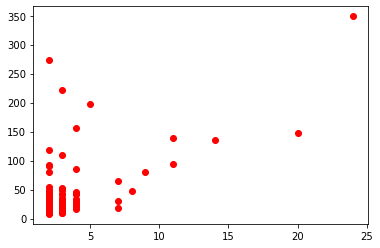

In [168]:
plt.scatter(x2,y,color='red')

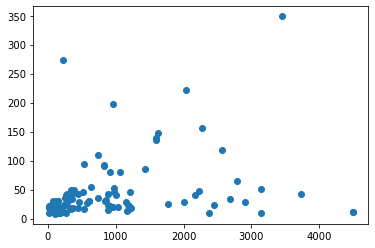

In [169]:
plt.scatter(x3,y)

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [171]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [172]:
y_pred = regressor.predict(X_test)

In [173]:
regressor.predict([[300,10]])

array([89.56072757])

In [174]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.650593690766404